<a href="https://www.kaggle.com/vikasmanjeda/gemstone-price-eda?scriptVersionId=88209873" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

**Importing data**

In [2]:
data = pd.read_csv('../input/gemstone-price-prediction/cubic_zirconia.csv')

In [3]:
# Check first 5 records 

data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
# Checking the shape of the dataset.

print('The shape of the dataset :', data.shape)

The shape of the dataset : (26967, 11)


In [5]:
data.columns

Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x',
       'y', 'z', 'price'],
      dtype='object')

In [6]:
# Info of the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [7]:
# drop the serial no column as it is useless

data.drop('Unnamed: 0',axis=1,inplace=True)

In [8]:
data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [9]:
# Summary of the dataset 

data.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


**Data preprocessing**

In [10]:
# Checking Missing value

data.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In dataset, there are 697 missing value in the depth column.

In [11]:
# Imputing missing values

data['depth'].median()

61.8

In [12]:
# Replace the missing values with median value. 

data = data.fillna(data['depth'].median())

In [13]:
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [14]:
# Checking for duplicate records in the dataset

dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 34


In [15]:
# drop the duplicates rows in the dataset

data.drop_duplicates(inplace=True) 

Now, data is ready for analysis.

In [16]:
data['cut'].value_counts()

Ideal        10805
Premium       6886
Very Good     6027
Good          2435
Fair           780
Name: cut, dtype: int64

In [17]:
data['color'].value_counts()

G    5653
E    4916
F    4723
H    4095
D    3341
I    2765
J    1440
Name: color, dtype: int64

In [18]:
data['clarity'].value_counts()

SI1     6565
VS2     6093
SI2     4564
VS1     4087
VVS2    2530
VVS1    1839
IF       891
I1       364
Name: clarity, dtype: int64

**Explanatory data analysis**

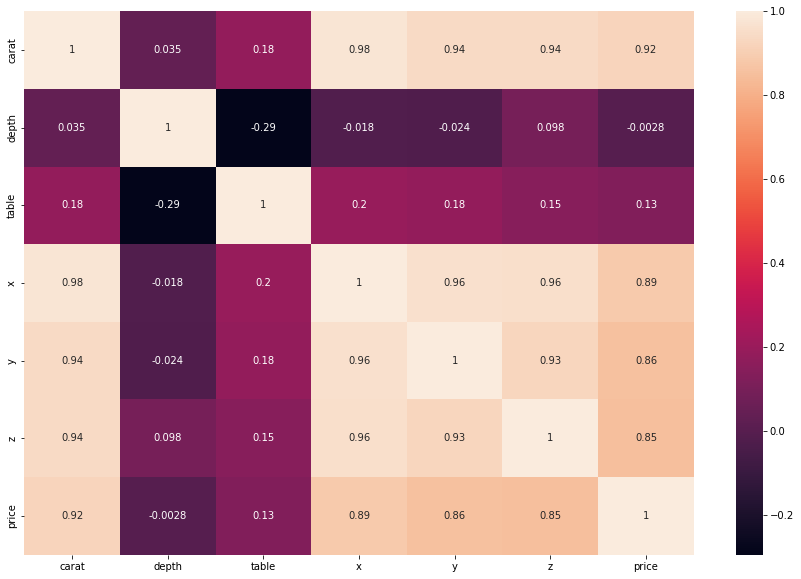

In [19]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(data.corr(), annot = True, ax = ax)
plt.show()

**Univariate Analysis**

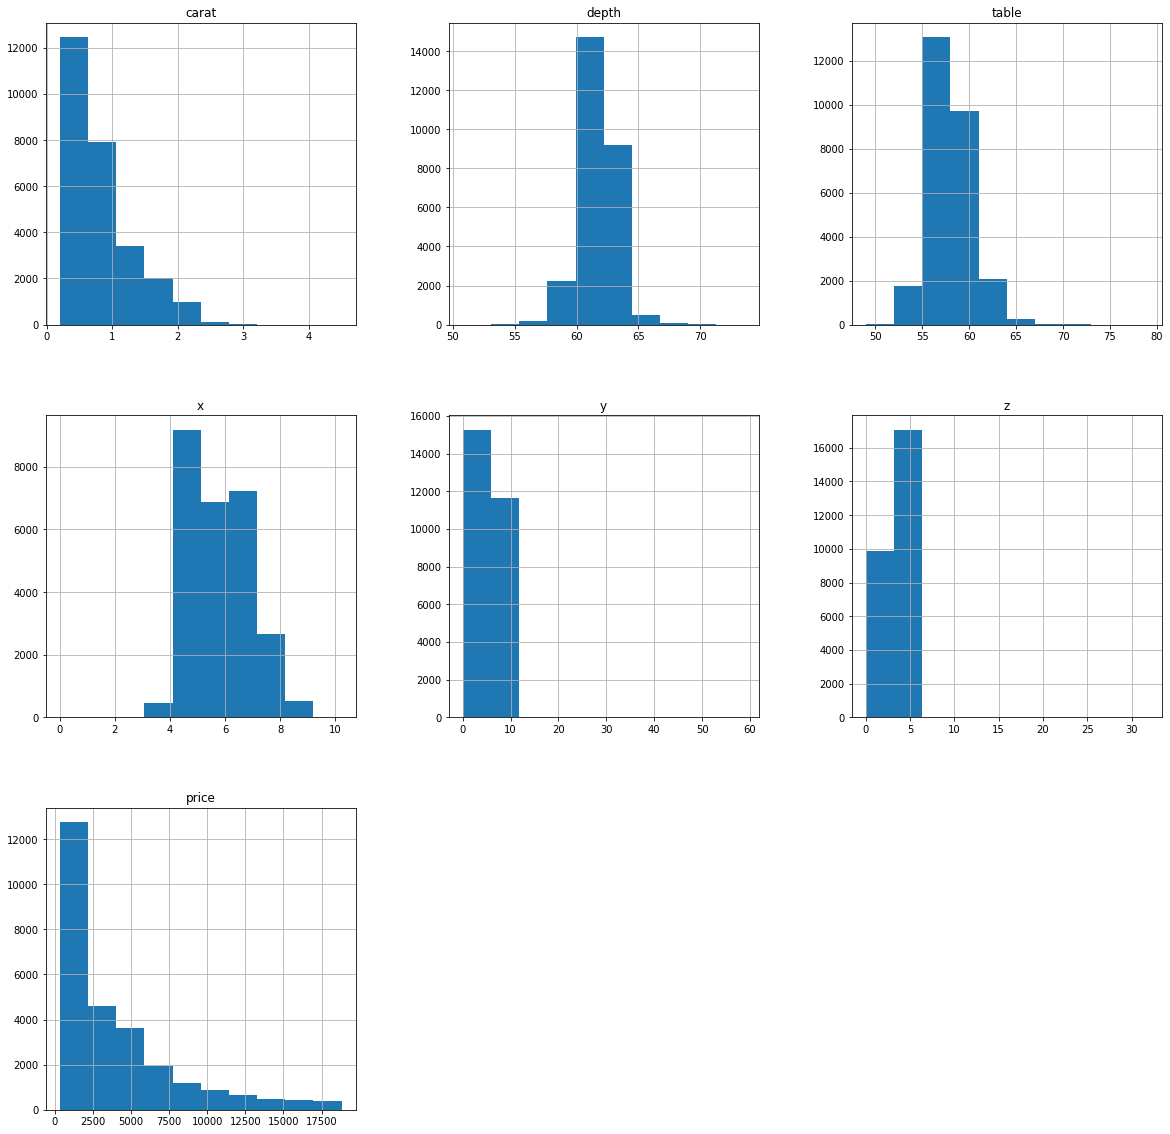

In [20]:
data.hist(figsize=(20,20))
plt.show()

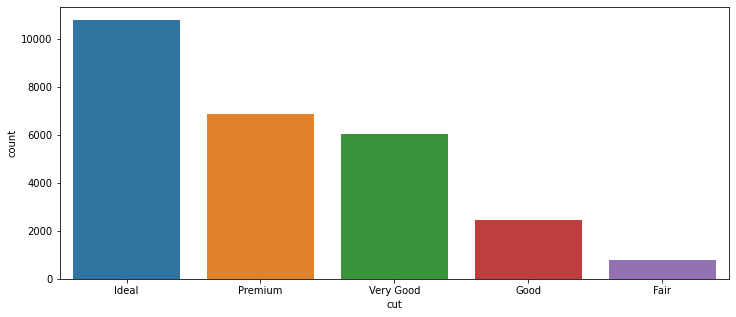

In [21]:
# BarPlot for Categorical columns 'CUT'.

plt.figure(figsize = (12,5))
sns.countplot('cut',data = data, order = data['cut'].value_counts().index)
plt.show()

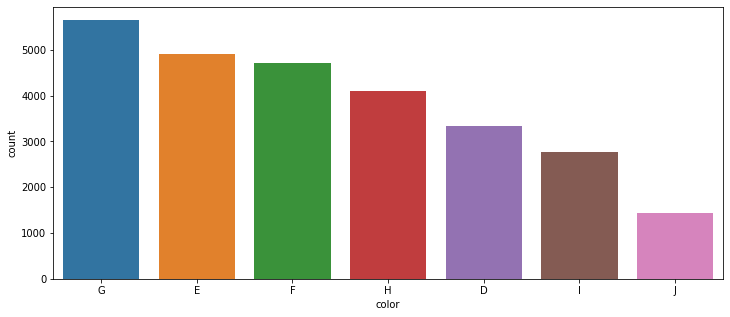

In [22]:
# BarPlot for categorical columns 'Color'.

plt.figure(figsize = (12,5))
sns.countplot('color',data = data, order = data['color'].value_counts().index)
plt.show()

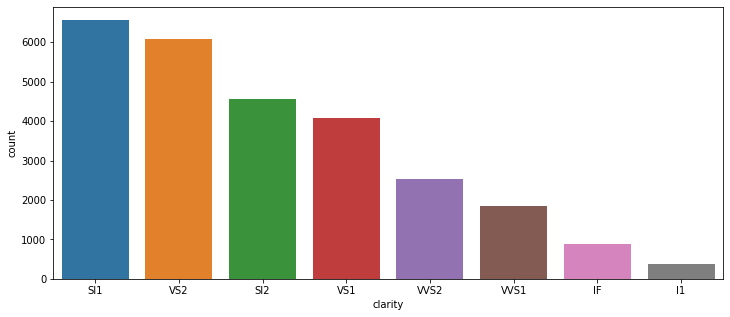

In [23]:
# Bar Plot for categorical columns 'Clarity'.

plt.figure(figsize = (12,5))
sns.countplot('clarity',data = data, order = data['clarity'].value_counts().index)
plt.show()

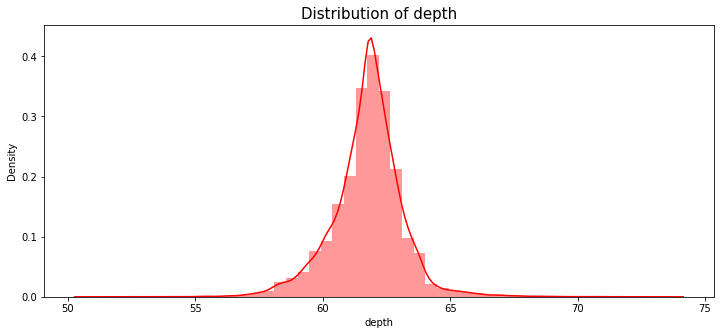

In [24]:
plt.figure(figsize = (12,5))
sns.distplot(data['depth'], color='red')
plt.title('Distribution of depth', fontsize = 15)
plt.show()

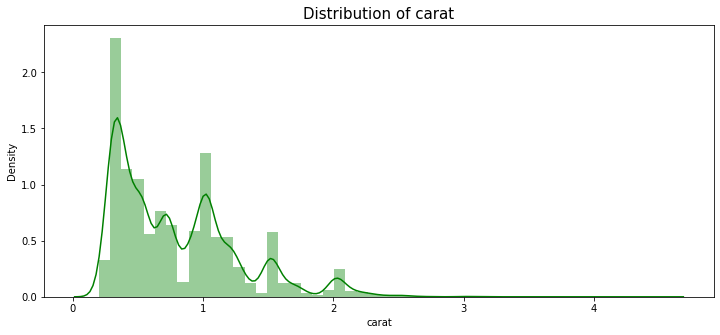

In [25]:
plt.figure(figsize = (12,5))
sns.distplot(data['carat'], color='green')
plt.title('Distribution of carat', fontsize = 15)
plt.show()

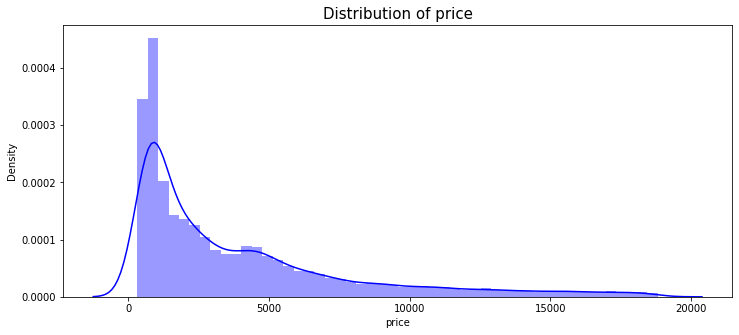

In [26]:
plt.figure(figsize = (12,5))
sns.distplot(data['price'], color='blue')
plt.title('Distribution of price', fontsize = 15)
plt.show()

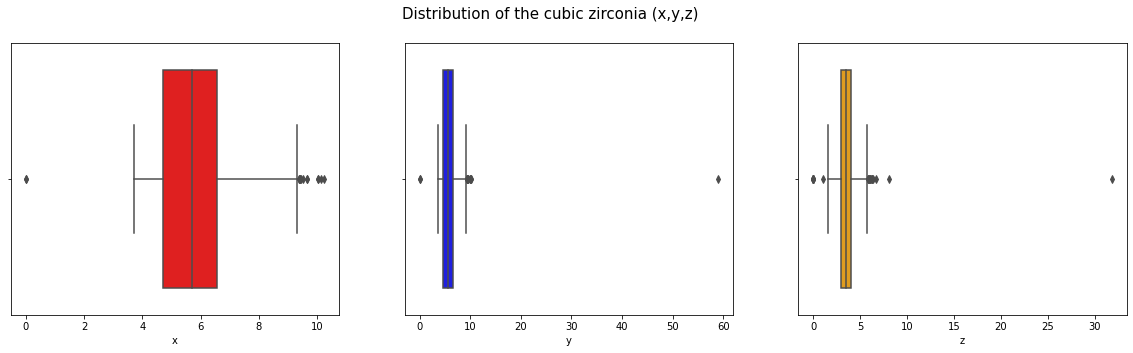

In [27]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.boxplot(data['x'], color='red')

plt.subplot(132)
sns.boxplot(data['y'], color='blue')

plt.subplot(133)
sns.boxplot(data['z'], color='orange')

plt.suptitle('Distribution of the cubic zirconia (x,y,z)', fontsize = 15)
plt.show()

**Multivariate analysis**

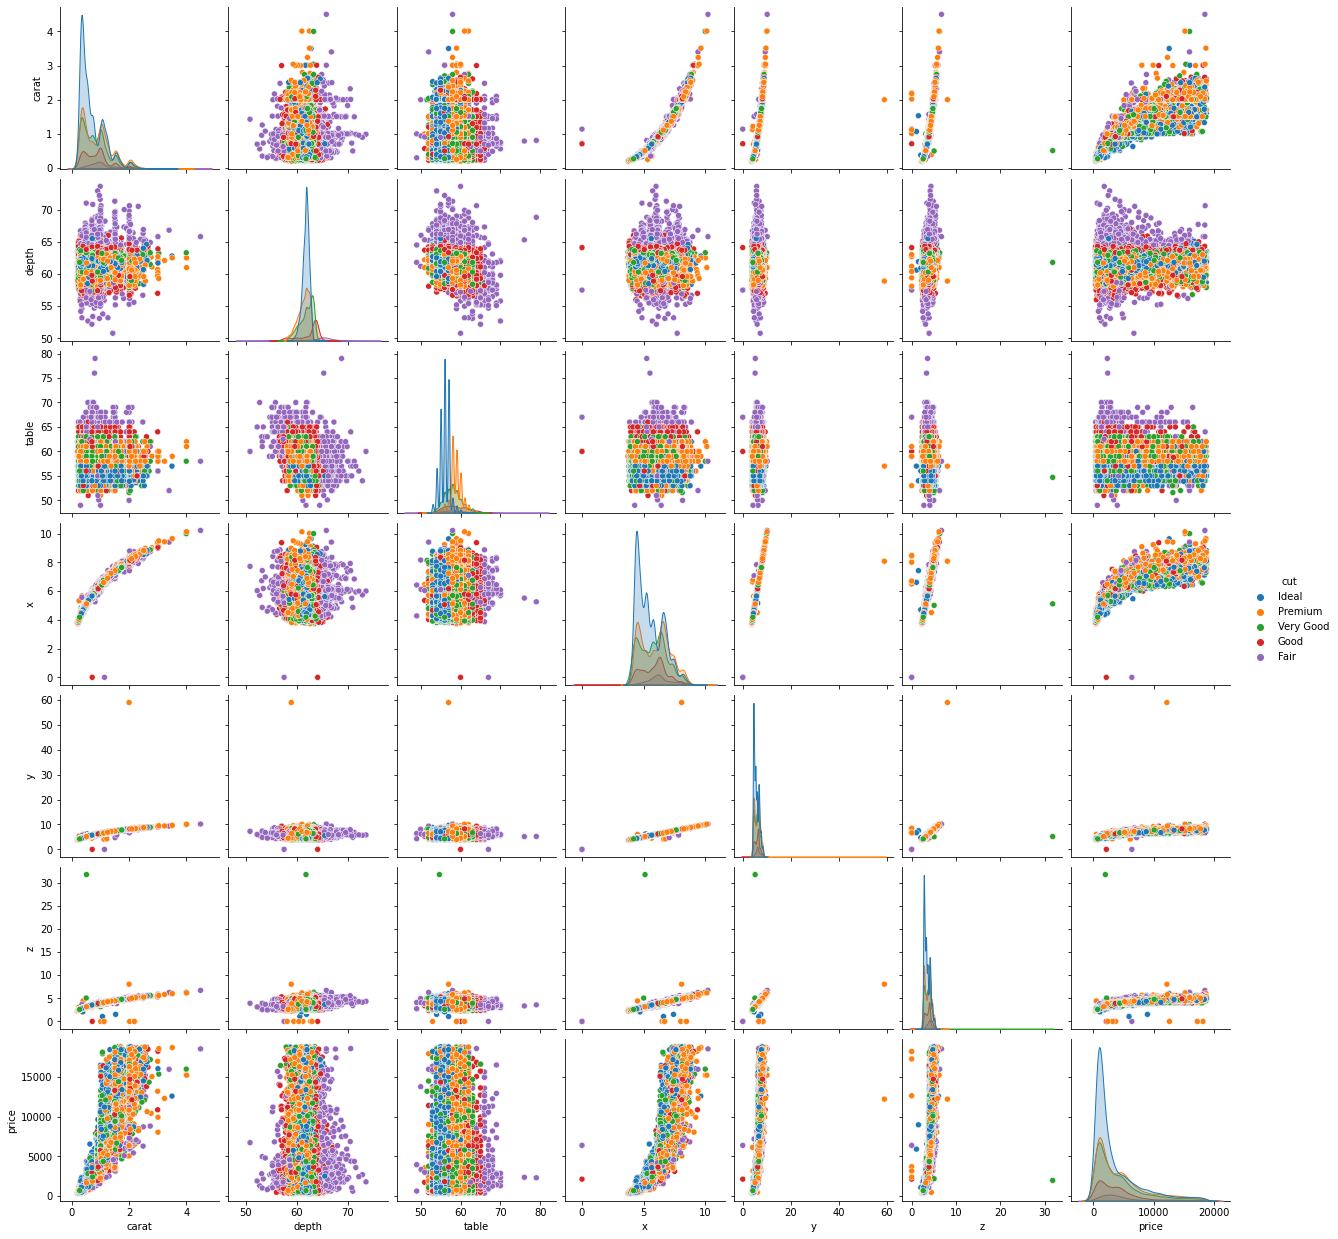

In [28]:
sns.pairplot(data, hue = 'cut')
plt.show()

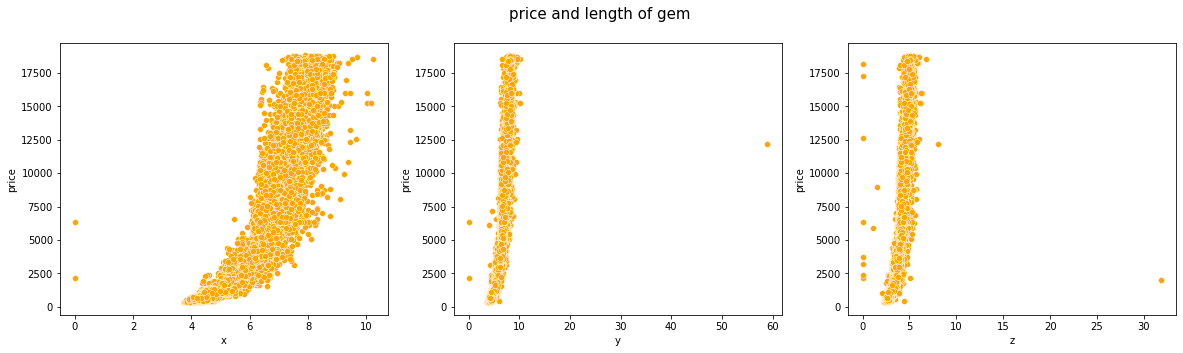

In [29]:
plt.rcParams['figure.figsize']= 20,5
plt.subplot(131)
sns.scatterplot(data['x'], data['price'], color='orange')

plt.subplot(132)
sns.scatterplot(data['y'], data['price'], color='orange')

plt.subplot(133)
sns.scatterplot(data['z'], data['price'], color='orange')

plt.suptitle('price and length of gem', fontsize = 15)
plt.show()

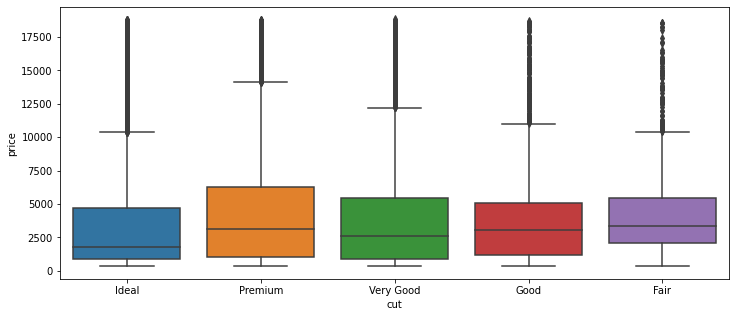

In [30]:
plt.figure(figsize = (12,5))
sns.boxplot(data['cut'], data['price'])
plt.show()

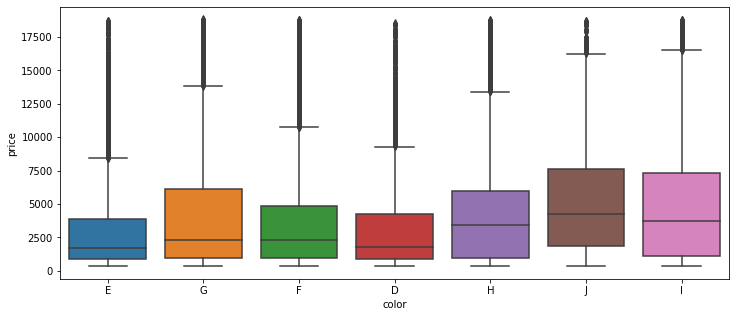

In [31]:
plt.figure(figsize = (12,5))
sns.boxplot(data['color'], data['price'])
plt.show()

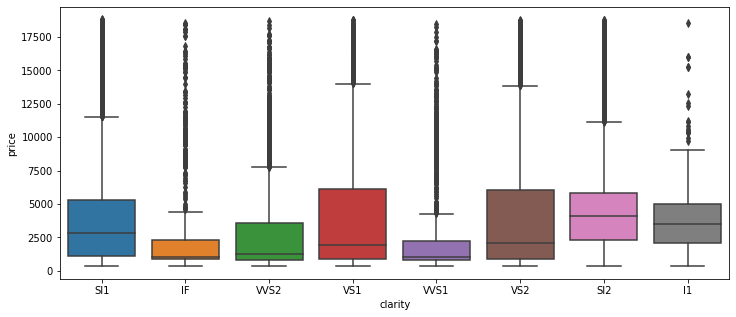

In [32]:
plt.figure(figsize = (12,5))
sns.boxplot(data['clarity'], data['price'])
plt.show()